In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/worldwide-temperature-trends-19612024/FAOSTAT_data_en_11-1-2024.csv
/kaggle/input/worldwide-temperature-trends-19612024/FAOSTAT_data_11-24-2020.csv
/kaggle/input/worldwide-temperature-trends-19612024/FAOSTAT_data_1-10-2022.csv
/kaggle/input/worldwide-temperature-trends-19612024/Environment_Temperature_change_E_All_Data_NOFLAG.csv


In [2]:
df = pd.read_csv(
    "/kaggle/input/worldwide-temperature-trends-19612024/Environment_Temperature_change_E_All_Data_NOFLAG.csv",
    encoding="latin1"
)

df.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,0.777,0.062,2.744,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.743,2.465,3.919,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,0.516,1.336,0.403,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


In [3]:
df.describe(include='all')

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
count,9656.000000,9656,9656.000000,9656,9656.00000,9656,9656,8287.000000,8322.000000,8294.000000,...,8435.000000,8437.000000,8350.000000,8427.000000,8377.000000,8361.000000,8348.000000,8366.000000,8349.000000,8365.000000
unique,NaN,284,NaN,17,NaN,2,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Afghanistan,NaN,January,NaN,Temperature change,°C,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,34,NaN,568,NaN,4828,9656,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,821.806338,NaN,7009.882353,NaN,6674.50000,NaN,NaN,0.402433,0.315527,0.317393,...,0.884504,0.768488,0.788930,0.829647,0.913872,1.018816,1.081491,1.003342,1.010832,1.094599
std,1781.072213,NaN,6.038255,NaN,596.53089,NaN,NaN,0.701567,0.713777,0.853133,...,0.878303,0.750631,0.858586,0.713753,0.815933,0.840189,0.877399,0.809800,0.872199,0.853953
min,1.000000,NaN,7001.000000,NaN,6078.00000,NaN,NaN,-4.018000,-5.391000,-8.483000,...,-6.072000,-4.854000,-5.785000,-3.642000,-5.367000,-4.068000,-3.306000,-3.584000,-2.216000,-2.644000
25%,78.000000,NaN,7005.000000,NaN,6078.00000,NaN,NaN,0.057000,-0.033000,0.030250,...,0.392000,0.365000,0.372250,0.408500,0.418000,0.437000,0.457000,0.443000,0.434000,0.455000
50%,153.500000,NaN,7009.000000,NaN,6674.50000,NaN,NaN,0.366000,0.333000,0.355000,...,0.771000,0.640000,0.651000,0.719000,0.745000,0.858000,0.949000,0.865000,0.810000,0.939000
75%,226.250000,NaN,7016.000000,NaN,7271.00000,NaN,NaN,0.676500,0.627000,0.647750,...,1.276500,1.091000,1.108000,1.126000,1.190000,1.389000,1.496000,1.364750,1.341000,1.508000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area Code     9656 non-null   int64  
 1   Area          9656 non-null   object 
 2   Months Code   9656 non-null   int64  
 3   Months        9656 non-null   object 
 4   Element Code  9656 non-null   int64  
 5   Element       9656 non-null   object 
 6   Unit          9656 non-null   object 
 7   Y1961         8287 non-null   float64
 8   Y1962         8322 non-null   float64
 9   Y1963         8294 non-null   float64
 10  Y1964         8252 non-null   float64
 11  Y1965         8281 non-null   float64
 12  Y1966         8364 non-null   float64
 13  Y1967         8347 non-null   float64
 14  Y1968         8345 non-null   float64
 15  Y1969         8326 non-null   float64
 16  Y1970         8308 non-null   float64
 17  Y1971         8303 non-null   float64
 18  Y1972         8323 non-null 

In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum().sort_values(ascending=False)

Y1991           1498
Y1983           1451
Y1976           1447
Y1985           1440
Y1982           1419
                ... 
Element Code       0
Months             0
Area               0
Months Code        0
Area Code          0
Length: 66, dtype: int64

In [7]:
df['Area'].nunique(), df['Element'].unique(), df['Months'].unique()

(284,
 array(['Temperature change', 'Standard Deviation'], dtype=object),
 array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
        'August', 'September', 'October', 'November', 'December',
        'Dec\x96Jan\x96Feb', 'Mar\x96Apr\x96May', 'Jun\x96Jul\x96Aug',
        'Sep\x96Oct\x96Nov', 'Meteorological year'], dtype=object))

# Data Cleaning & Reshaping

In [8]:
df_long = df.melt(
    id_vars=['Area', 'Element', 'Months', 'Unit'],
    value_vars=[col for col in df.columns if col.startswith('Y')],
    var_name='Year',
    value_name='Value'
)

# Clean up the 'Year' column (remove 'Y' and convert to int)
df_long['Year'] = df_long['Year'].str.replace('Y', '').astype(int)
df_long

,Area,Element,Months,Unit,Year,Value
0,Afghanistan,Temperature change,January,°C,1961,0.777
1,Afghanistan,Standard Deviation,January,°C,1961,1.950
2,Afghanistan,Temperature change,February,°C,1961,-1.743
3,Afghanistan,Standard Deviation,February,°C,1961,2.597
4,Afghanistan,Temperature change,March,°C,1961,0.516
...,...,...,...,...,...,...
569699,OECD,Standard Deviation,JunJulAug,°C,2019,0.247
569700,OECD,Temperature change,SepOctNov,°C,2019,1.233
569701,OECD,Standard Deviation,SepOctNov,°C,2019,0.378
569702,OECD,Temperature change,Meteorological year,°C,2019,1.297


# Missing Data

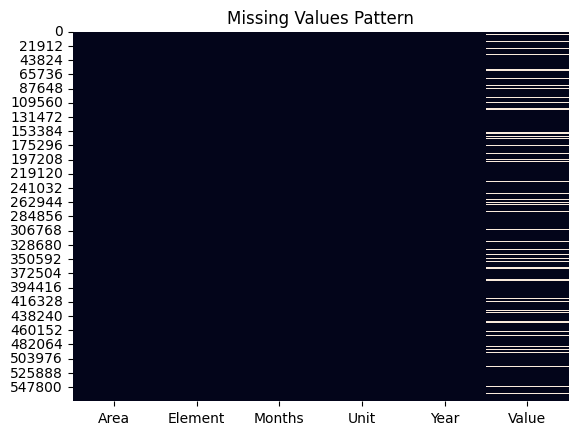

0.13709399969106764

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df_long.isnull(), cbar=False)
plt.title('Missing Values Pattern')
plt.show()

df_long['Value'].isna().mean()  # % missing

# High-Level Insights

## Top and Bottom Countries by Mean Value

In [10]:
df_long.groupby('Area')['Value'].mean().sort_values(ascending=False).head(10)

Area
Svalbard and Jan Mayen Islands    1.574279
Serbia                            1.518874
Luxembourg                        1.492529
Montenegro                        1.490134
Estonia                           1.460210
Slovenia                          1.430326
Belgium                           1.427415
Belarus                           1.408882
Russian Federation                1.408786
Latvia                            1.407250
Name: Value, dtype: float64

In [11]:
df_long.groupby('Area')['Value'].mean().sort_values(ascending=True).head(10)

Area
Nauru                              -0.115433
Marshall Islands                    0.100166
Pacific Islands Trust Territory     0.123607
Micronesia (Federated States of)    0.222034
Micronesia                          0.225544
Singapore                           0.246156
Indonesia                           0.262658
Ethiopia PDR                        0.287215
Papua New Guinea                    0.293154
Rwanda                              0.301374
Name: Value, dtype: float64

## Global Trend Over Time

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


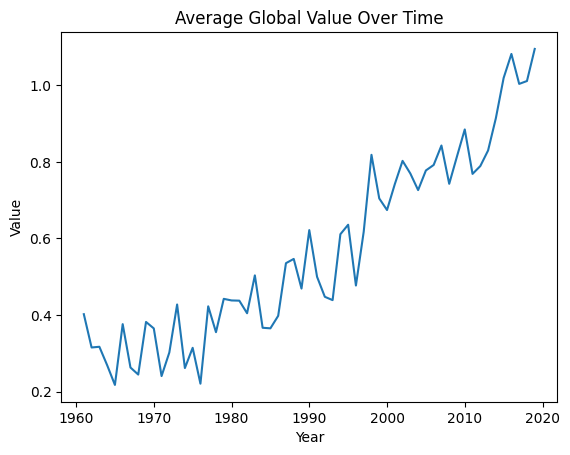

In [12]:
yearly_mean = df_long.groupby('Year')['Value'].mean().reset_index()
sns.lineplot(data=yearly_mean, x='Year', y='Value')
plt.title('Average Global Value Over Time')
plt.show()

## Regional Comparisons

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

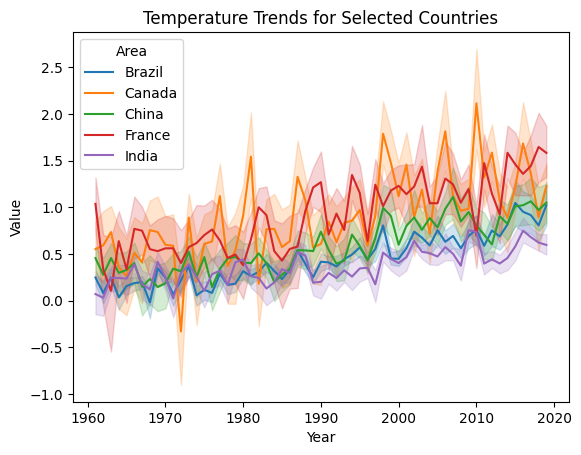

In [13]:
sample_countries = ['Canada', 'India', 'Brazil', 'China', 'France']
subset = df_long[df_long['Area'].isin(sample_countries)]
sns.lineplot(data=subset, x='Year', y='Value', hue='Area')
plt.title('Temperature Trends for Selected Countries')
plt.show()

# Seasonal Analysis

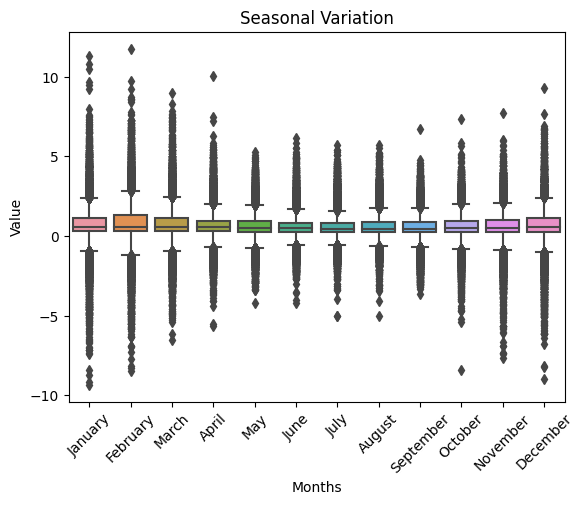

In [14]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

sns.boxplot(data=df_long, x='Months', y='Value', order=month_order)
plt.xticks(rotation=45)
plt.title('Seasonal Variation')
plt.show()

# Statistical Overview

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


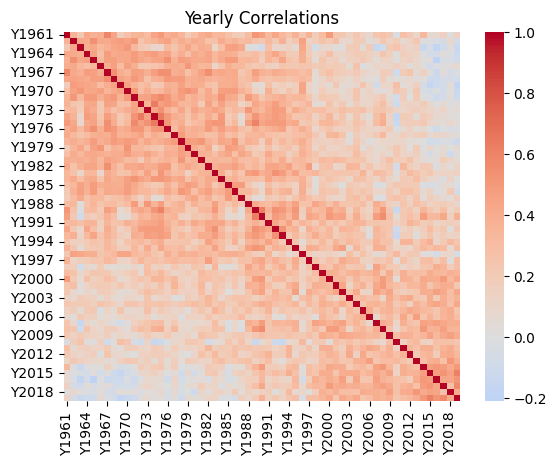

In [15]:
df_long.groupby('Area')['Value'].agg(['mean', 'std', 'min', 'max']).head()

# Correlation across years (optional)
year_cols = [col for col in df.columns if col.startswith('Y')]
sns.heatmap(df[year_cols].corr(), cmap='coolwarm', center=0)
plt.title('Yearly Correlations')
plt.show()

# Trend Analysis per Country or Element

In [16]:
from scipy.stats import linregress

def trend(group):
    slope, _, _, _, _ = linregress(group['Year'], group['Value'].fillna(method='ffill'))
    return slope

trends = df_long.groupby('Area').apply(trend).sort_values(ascending=False)
trends.head(10)

/tmp/ipykernel_13/3386361755.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  slope, _, _, _, _ = linregress(group['Year'], group['Value'].fillna(method='ffill'))
/tmp/ipykernel_13/3386361755.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  trends = df_long.groupby('Area').apply(trend).sort_values(ascending=False)


Area
Svalbard and Jan Mayen Islands    0.040032
Kuwait                            0.020898
Finland                           0.020565
Austria                           0.020244
Bahrain                           0.020215
Eastern Europe                    0.019267
Morocco                           0.019189
Liechtenstein                     0.019070
Tunisia                           0.019048
Germany                           0.018953
dtype: float64

# Interactive Visualization

In [17]:
import plotly.express as px

fig = px.line(df_long, x='Year', y='Value', color='Area',
              title='Temperature Change Over Time (Interactive)')
fig.show(renderer="iframe")